<a href="https://colab.research.google.com/github/keithvtls/Numerical-Method-Activities/blob/main/finals/58015_Numerical_Integration_Yon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Members:

D.M. Fajardo © 2021

I.J. Timbungco © 2021

M.A. Rodriguez © 2021

N.K. Vitales © 2021

In [ ]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt 

# 1.)

# scipy.integrate_quad
- Computes a definite integral
- General purpose integration
- Quad function is the powerhouse of integral functions of SciPy.
- For larger or infinite integration bounds, the accuracy and efficiency depends on the algorithm; Passing the bounds as np.-inf, np.inf is risky.  

References: 

[1] SciPy.org (2021). **[SciPy.org: scipy.integrate.quad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html)**

[2] stackoverflow (2021). **[stackoverflow: How does scipy.integrate.quad know when to stop?](https://stackoverflow.com/questions/49738870/how-does-scipy-integrate-quad-know-when-to-stop)**

[3] eSparkBiz (2021). **[esparkinfo: python integration](https://www.esparkinfo.com/python-integration.html)**



### Calculate:
$$  \int^3_0 (15x^4-13x^2+x)dx \\ $$

In [ ]:
## Function we want to integrate
def f(x):
  return 15*x**4-13*x**2+x

## Call quad to integrate f from 3 to 0
answer,err = integrate.quad(f,0,3)
print('The Numerical Integration is: {:.2f}'.format(answer))
print('Expected Absolute Error: {}'.format(err))

The Numerical Integration is: 616.50
Expected Absolute Error: 6.866516429920506e-12


### Calculate:
$$  \int^4_1 (cos(x)-\frac{3}{x^5})dx \\ $$

In [ ]:
## Function we want to integrate
def f(x):
  return np.cos(x)-(3/x**5)

## Call quad to integrate f from 1 to 4
answer,err = integrate.quad(f,1,4)
print('The Numerical Integration is: {:.2f}'.format(answer))
print('Expected Absolute Error: {}'.format(err))

The Numerical Integration is: -2.35
Expected Absolute Error: 1.0275756416624452e-10


### Calculate:
$$  \int^2_0 log_4(x)dx $$

In [ ]:
## Function we want to integrate
def f(x):
  return np.log(4**x)

## Call quad to integrate f from 0 to 2
answer,err = integrate.quad(f,0,2)
print('The Numerical Integration is: {:.2f}'.format(answer))
print('Expected Absolute Error: {}'.format(err))

The Numerical Integration is: 2.77
Expected Absolute Error: 3.078191837246648e-14


# scipy.integrate_fixed quad

- Computes definite integral using fixed-order Gaussian quadrature.
- Integrate func(x) using Gaussian quadrature of order n.
- This method is stable, convergent, and accurate

Reference:

[4] SciPy.org (2021). **[SciPy.org: scipy.integrate.fixed_quad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.fixed_quad.html
)**

[5] Benton, Dudley. (2021). Retrieved from: **[What is the best Numerical integration method, and why?](https://www.researchgate.net/post/What_is_the_best_Numerical_integration_method_and_why/602e9389bb7f5667e27a25e2/citation/download.)**



### Calculate:
$$  \int^3_0 (15x^4-13x^2+x)dx \\ $$

In [ ]:
## Function we want to integrate
def f(x):
  return 15*x**4-13*x**2+x

## Call quad to integrate f from 0 to 3
answer,err = integrate.fixed_quad(f,0,3)
print('The Numerical Integration is: {:.2f}'.format(answer))

The Numerical Integration is: 616.50


### Calculate:
$$  \int^4_1 (cos(x)-\frac{3}{x^5})dx \\ $$

In [ ]:
## Function we want to integrate
def f(x):
  return np.cos(x)-(3/x**5)

## Call quad to integrate f from 1 to 4
answer,err = integrate.fixed_quad(f,1,4)
print('The Numerical Integration is: {:.2f}'.format(answer))

The Numerical Integration is: -2.34


### Calculate:
$$  \int^2_0 log_4(x)dx $$

In [ ]:
## Function we want to integrate
def f(x):
  return np.log(4**x)

## Call quad to integrate f from 0 to 2
answer,err = integrate.fixed_quad(f,0,2)
print('The Numerical Integration is: {:.2f}'.format(answer))

The Numerical Integration is: 2.77



# 2.)

In [ ]:
# analytical solution
a, b = 0,10
def intf(a,b):
    intf = ((4*b-3)**4 - (4*a-3)**4)/16
    return intf
asol = intf(a,b)

# Trapezoidal rule (Sample One)

In [ ]:
def trapz_rule(func,lb,ub,size):
  h = (ub-lb)/size # ----> size is bin
  return h*(0.5*(func(lb)+func(ub))+np.sum(func(lb+h*np.arange(1,size))))

In [ ]:
### Higher-Order Polynomials (degrees greater than 4)

f = lambda x: x**5-2*x**4+3.6*x**3-0.51*x**2-1.33*x-0.2
a, b = 0,10
n = 1e4
hop_tans1 = trapz_rule(f, a,b,n)
hop_terr1 = (abs(asol-hop_tans1)/asol)*100


In [ ]:
### Trigonometric Functions
f = lambda x:  np.sin(2*x)-np.cos(2*x)
a, b = 0,10
n = 1e4
trig_tans1 = trapz_rule(f, a,b,n)
trig_terr1 = (abs(asol-trig_tans1)/asol)*100

In [ ]:
### Logarithmic Functions

f = lambda x: np.log(x**2+1)
a, b = 0,10
n = 1e4
log_tans1 = trapz_rule(f, a,b,n)
log_terr1 = (abs(asol-log_tans1)/asol)*100

# Trapezoidal rule (Sample Two)

In [ ]:
### Higher-Order Polynomials (degrees greater than 4)
f = lambda x:-5*x**5-2*x**4+x**2+1.33*x-0.4
a, b = 0,10
n = 1e4
hop_tans2 = trapz_rule(f, a,b,n)
hop_terr2 = (abs(asol-hop_tans2)/asol)*100

In [ ]:
### Trigonometric Functions

f = lambda x: 2*np.sin(2*x)
a, b = 0,10
n = 1e4
trig_tans2 = trapz_rule(f, a,b,n)
trig_terr2 = (abs(asol-trig_tans2)/asol)*100

In [ ]:
### Logarithmic Functions

f = lambda x: np.log(x**3-0.0125*x+1.7)
a, b = 0,10
n = 1e4
log_tans2 = trapz_rule(f, a,b,n)
log_terr2 = (abs(asol-log_tans2)/asol)*100

# Simpson's 1/3 Rule (Sample One)

In [ ]:
def simp_13(func,lb,ub,divs):
  h = (ub-lb)/divs
  A = (func(lb)+func(ub))+ \
            np.sum(4*func(lb+h*np.arange(1,divs,2)))+ \
            np.sum(2*func(lb+h*np.arange(2,divs,2)))
  S = (h/3)*A
  return S

In [ ]:
### Higher-Order Polynomials (degrees greater than 4)

f = lambda x : x**5-2*x**4+3.6*x**3-0.51*x**2-1.33*x-0.2
a, b = 0,10
n = 1e4
hop13_sans1 = simp_13(f, a,b,n)
hop13_serr1 = (abs(asol-hop13_sans1)/asol)*100

In [ ]:
### Trigonometric Functions

f = lambda x : np.sin(2*x)-np.cos(2*x)
a, b = 0,10
n = 1e4
trig13_sans1 = simp_13(f, a,b,n)
trig13_serr1 = (abs(asol-trig13_sans1)/asol)*100

In [ ]:
### Logarithmic Functions

f = lambda x : np.log(x**2+1)
a, b = 0,10
n = 1e4
log13_sans1 = simp_13(f, a,b,n)
log13_serr1 = (abs(asol-log13_sans1)/asol)*100

# Simpson's 1/3 Rule (Sample Two)

In [ ]:
### Higher-Order Polynomials (degrees greater than 4)

f = lambda x : -5*x**5-2*x**4+x**2+1.33*x-0.4
a, b = 0,10
n = 1e4
hop13_sans2 = simp_13(f, a,b,n)
hop13_serr2 = (abs(asol-hop13_sans2)/asol)*100

In [ ]:
### Trigonometric Functions

f = lambda x : 2*np.sin(2*x)
a, b = 0,10
n = 1e4
trig13_sans2 = simp_13(f, a,b,n)
trig13_serr2 = (abs(asol-trig13_sans2)/asol)*100

In [ ]:
### Logarithmic Functions

f = lambda x : np.log(x**3-0.0125*x+1.7)
a, b = 0,10
n = 1e4
log13_sans2 = simp_13(f, a,b,n)
log13_serr2 = (abs(asol-log13_sans2)/asol)*100

# Simpson's 3/8 Rule (Sample One)

In [ ]:
def simp_38(func,lb,ub,divs):
  h = (ub-lb)/divs
  A = (func(lb)+func(ub))+ \
            np.sum(3*(func(lb+h*np.arange(1,divs,3))))+ \
            np.sum(3*(func(lb+h*np.arange(2,divs,3))))+ \
            np.sum(2*func(lb+h*np.arange(3,divs,3)))
  S = (3*h/8)*A
  return S

In [ ]:
### Higher-Order Polynomials (degrees greater than 4)

f = lambda x :  x**5-2*x**4+3.6*x**3-0.51*x**2-1.33*x-0.2
a, b = 0,10
n = 1e4
hop38_sans1 = simp_38(f, a,b,n)
hop38_serr1 = (abs(asol-hop38_sans1)/asol)*100

In [ ]:
### Trigonometric Functions

f = lambda x : np.sin(2*x)-np.cos(2*x)
a, b = 0,10
n = 1e4
trig38_sans1 = simp_38(f, a,b,n)
tri38_serr1 = (abs(asol-trig38_sans1)/asol)*100

In [ ]:
### Logarithmic Functions

f = lambda x : np.log(x**2+1)
a, b = 0,10
n = 1e4
log38_sans1 = simp_38(f, a,b,n)
log38_serr1 = (abs(asol-log38_sans1)/asol)*100

# Simpson's 3/8 Rule (Sample Two)

In [ ]:
### Higher-Order Polynomials (degrees greater than 4)

f = lambda x : -5*x**5-2*x**4+x**2+1.33*x-0.4
a, b = 0,10
n = 1e4
hop38_sans2 = simp_38(f, a,b,n)
hop38_serr2 = (abs(asol-hop38_sans2)/asol)*100

In [ ]:
### Trigonometric Functions

f = lambda x : 2*np.sin(2*x)
a, b = 0,10
n = 1e4
trig38_sans2 = simp_38(f, a,b,n)
tri38_serr2 = (abs(asol-trig38_sans2)/asol)*100

In [ ]:
### Logarithmic Functions

f = lambda x : np.log(x**3-0.0125*x+1.7)
a, b = 0,10
n = 1e4
log38_sans2 = simp_38(f, a,b,n)
log38_serr2 = (abs(asol-log38_sans2)/asol)*100

# Monte Carlo Integration (Sample One)

In [ ]:
def MonteCarlo(f, a, b, n):
    random_samples = np.random.uniform(a,b,int(n))
    function_values = f(random_samples)
    estimate = (np.sum(function_values) / n) * (b - a)
    uncertainty = np.abs(b - a) * np.sqrt(((np.sum(function_values**2) / n) - (np.sum(function_values / n)**2)) / n)
    return estimate, uncertainty

In [ ]:
### Higher-Order Polynomials (degrees greater than 4)

f = lambda x:x**5-2*x**4+3.6*x**3-0.51*x**2-1.33*x-0.2
a, b = 0, 10
n = 1e4
hop_mcans1, hop_mcerr1 = MonteCarlo(f,a, b, n)

In [ ]:
### Trigonometric Functions

f = lambda x:np.sin(2*x)-np.cos(2*x)
a, b = 0, 10
n = 1e4
trig_mcans1, trig_mcerr1 = MonteCarlo(f,a, b, n)

In [ ]:
### Logarithmic Functions

f = lambda x:np.log(x**2+1)
a, b = 0, 10
n = 1e4
log_mcans1, log_mcerr1 = MonteCarlo(f,a, b, n)

# Monte Carlo Integration (Sample Two)

In [ ]:
### Higher-Order Polynomials (degrees greater than 4)

f = lambda x:-5*x**5-2*x**4+x**2+1.33*x-0.4
a, b = 0, 10
n = 1e4
hop_mcans2, hop_mcerr2 = MonteCarlo(f,a, b, n)

In [ ]:
### Trigonometric Functions

f = lambda x: 2*np.sin(2*x)
a, b = 0, 10
n = 1e4
trig_mcans2, trig_mcerr2 = MonteCarlo(f,a, b, n)

In [ ]:
### Logarithmic Functions

f = lambda x:np.log(x**3-0.0125*x+1.7)
a, b = 0, 10
n = 1e4
log_mcans1, log_mcerr2 = MonteCarlo(f,a, b, n)

# Scipy Functions 

## Using scipy.integrate_quad

### Higher-Order Polynomials (degrees greater than 4)

In [ ]:
# Sample One

def f(x):
  return x**5-2*x**4+3.6*x**3-0.51*x**2-1.33*x-0.2

hop_iqanswer1,hop_iqerr1 = integrate.quad(f,0,10)

In [ ]:
# Sample Two

def f(x):
  return -5*x**5-2*x**4+x**2+1.33*x-0.4

hop_iqans2,hop_iqerr2 = integrate.quad(f,0,10)

### Trigonometric Functions

In [ ]:
# Sample One

def f(x):
  return np.sin(2*x)-np.cos(2*x)

trig_iqans1,trig_iqerr1 = integrate.quad(f,0,10)

In [ ]:
# Sample Two

def f(x):
  return 2*np.sin(2*x)

trig_iqans2,trig_iqerr2 = integrate.quad(f,0,10)

### Logarithmic Functions

In [ ]:
# Sample One

def f(x):
  return np.log(x**2+1)

log_iqans1,log_iqerr1 = integrate.quad(f,0,10)

In [ ]:
# Sample Two

def f(x):
  return np.log(x**3-0.0125*x+1.7)

log_iqans2,log_iqerr2 = integrate.quad(f,0,10)

## Using scipy.integrate_fixed quad

### Higher-Order Polynomials (degrees greater than 4)

In [ ]:
# Sample One

def f(x):
  return x**5-2*x**4+3.6*x**3-0.51*x**2-1.33*x-0.2

hop_ifqans1,hop_ifqerr1 = integrate.fixed_quad(f,0,10)

In [ ]:
# Sample Two

def f(x):
  return -5*x**5-2*x**4+x**2+1.33*x-0.4

hop_ifqans2,hop_ifqerr2 = integrate.fixed_quad(f,0,10)

### Trigonometric Functions

In [ ]:
# Sample One

def f(x):
  return np.sin(2*x)-np.cos(2*x)

trig_ifqans1,trig_ifqerr1 = integrate.fixed_quad(f,0,10)

In [ ]:
# Sample Two

def f(x):
  return 2*np.sin(2*x)

trig_ifqans2,trig_ifqerr2 = integrate.fixed_quad(f,0,10)

### Logarithmic Functions

In [ ]:
# Sample One

def f(x):
  return np.log(x**2+1)

log_ifqans1,log_ifqerr1 = integrate.fixed_quad(f,0,10)

In [ ]:
# Sample Two

def f(x):
  return np.log(x**3-0.0125*x+1.7)

log_ifqans2,log_ifqerr2 = integrate.fixed_quad(f,0,10)

## Error

In [ ]:
print('\tFirst Case Sample')
print('\nMethod                       Functions                       Answer                    Error')
print('----------------------------------------------------------------------------------------------')
print('Trapezoid                    Higher-Order Polynomials        {}        {}'.format(hop_tans1,hop_terr1))
print('Simpson 1/3                                                  {}        {}'.format(hop13_sans1,hop13_serr1))
print('Simpson 3/8                                                  {}        {}'.format(hop38_sans1,hop38_serr1))
print('Monte Carlo                                                  {}        {}'.format(hop_mcans1, hop_mcerr1))
print('scipy.integrate_quad                                         {}         {}'.format(hop_iqanswer1,hop_iqerr1))
print('scipy.integrate_fixed quad                                   {}        {}'.format(hop_ifqans1,hop_ifqerr1))
print('\n')
print('Trapezoid                    Trigonometric Functions        {}       {}'.format(trig_tans1,trig_terr1))
print('Simpson 1/3                                                 {}       {}'.format(trig13_sans1,trig13_serr1))
print('Simpson 3/8                                                 {}        {}'.format(trig38_sans1,tri38_serr1))
print('Monte Carlo                                                 {}        {}'.format(trig_mcans1, trig_mcerr1))
print('scipy.integrate_quad                                        {}       {}'.format(trig_iqans1,trig_iqerr1))
print('scipy.integrate_fixed quad                                   {}        {}'.format(trig_ifqans1,trig_ifqerr1))
print('\n')
print('Trapezoid                    Logarithmic Functions           {}        {}'.format(log_tans1,log_terr1))
print('Simpson 1/3                                                  {}        {}'.format(log13_sans1,log13_serr1))
print('Simpson 3/8                                                  {}        {}'.format(log38_sans1,tri38_serr1))
print('Monte Carlo                                                  {}         {}'.format(log_mcans1, log38_serr1))
print('scipy.integrate_quad                                         {}         {}'.format(log_iqans1,log_iqerr1))
print('scipy.integrate_fixed quad                                   {}         {}'.format(log_ifqans1,log_ifqerr1))

	First Case Sample

Method                       Functions                       Answer                    Error
----------------------------------------------------------------------------------------------
Trapezoid                    Higher-Order Polynomials        135428.17025581666        15.622103863926116
Simpson 1/3                                                  135428.16666666672        15.622100799681307
Simpson 3/8                                                  135407.28817559654        15.604275741139361
Monte Carlo                                                  138250.7729449929        2100.970642310829
scipy.integrate_quad                                         135428.1666666667         1.5035641277031084e-09
scipy.integrate_fixed quad                                   135428.16666666654        None


Trapezoid                    Trigonometric Functions        -0.16051360276595403       100.0001370388481
Simpson 1/3                                                 -

In [ ]:
print('\tSecond Case Sample')
print('\nMethod                       Functions                       Answer                    Error')
print('----------------------------------------------------------------------------------------------')
print('Trapezoid                    Higher-Order Polynomials       {}         {}'.format(hop_tans2,hop_terr2))
print('Simpson 1/3                                                 {}         {}'.format(hop13_sans2,hop13_serr2))
print('Simpson 3/8                                                 {}         {}'.format(hop38_sans2,hop38_serr2))
print('Monte Carlo                                                 {}         {}'.format(hop_mcans2, hop_mcerr2))
print('scipy.integrate_quad                                        {}                  {}'.format(hop_iqans2,hop_iqerr2))
print('scipy.integrate_fixed quad                                  {}         {}'.format(hop_ifqans2,hop_ifqerr2))
print('\n')
print('Trapezoid                    Trigonometric Functions         {}         {}'.format(trig_tans2,trig_terr2))
print('Simpson 1/3                                                  {}         {}'.format(trig13_sans2,trig13_serr2))
print('Simpson 3/8                                                  {}        {}'.format(trig38_sans2,tri38_serr2))
print('Monte Carlo                                                  {}        {}'.format(trig_mcans2, trig_mcerr2))
print('scipy.integrate_quad                                         {}        {}'.format(trig_iqans2,trig_iqerr2))
print('scipy.integrate_fixed quad                                  {}        {}'.format(trig_ifqans2,trig_ifqerr2))
print('\n')
print('Trapezoid                    Logarithmic Functions           {}         {}'.format(log_tans2,log_terr2))
print('Simpson 1/3                                                  {}        {}'.format(log13_sans2,log13_serr2))
print('Simpson 3/8                                                  {}         {}'.format(log38_sans2,tri38_serr2))
print('Monte Carlo                                                  {}         {}'.format(log_mcans1, log_mcerr2))
print('scipy.integrate_quad                                         {}         {}'.format(log_iqans2,log_iqerr2))
print('scipy.integrate_fixed quad                                   {}         {}'.format(log_ifqans2,log_ifqerr2))


	Second Case Sample

Method                       Functions                       Answer                    Error
----------------------------------------------------------------------------------------------
Trapezoid                    Higher-Order Polynomials       -872937.5214983334         845.2723653191612
Simpson 1/3                                                 -872937.5000000002         845.272346964911
Simpson 3/8                                                 -872807.5604744668         845.1614108037793
Monte Carlo                                                 -873182.391598228         12999.363294033967
scipy.integrate_quad                                        -872937.5                  9.691553910079873e-09
scipy.integrate_fixed quad                                  -872937.4999999993         None


Trapezoid                    Trigonometric Functions         0.591917740880616         99.99949464890217
Simpson 1/3                                                  0.5

# 3.)

In [ ]:
h = lambda x: x**2
def simp_38(func,lb,ub,divs): #divs= bin/sizes
  h = (ub-lb)/divs
  A = (func(lb)+func(ub))+ \
            np.sum(3*(func(lb+h*np.arange(1,divs,3))))+ \
            np.sum(3*(func(lb+h*np.arange(2,divs,3))))+ \
            np.sum(2*func(lb+h*np.arange(3,divs,3)))
  S = (3*h/8)*A
  return S

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


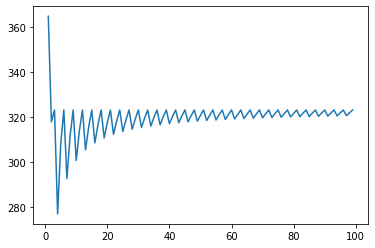

In [ ]:
bin = 1000
x_range = np.arange(0,100)
y_range = np.zeros(x_range.size)

for i in x_range:
    y_range[i] = abs((bin/100) - simp_38(h,0,10,i))
plt.plot(x_range,y_range)

In [ ]:
def MonteCarlo(f, a, b, n):
    random_samples = np.random.uniform(a,b,int(n))
    function_values = f(random_samples)
    estimate = (np.sum(function_values) / n) * (b - a)
    uncertainty = np.abs(b - a) * np.sqrt(((np.sum(function_values**2) / n) - (np.sum(function_values / n)**2)) / n)
    return uncertainty

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


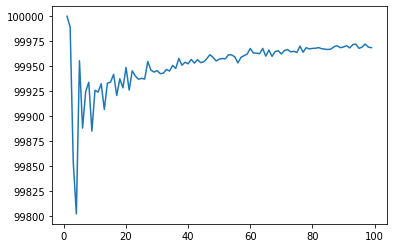

In [ ]:
bin = 1000
x_range = np.arange(0,100)
y_range = np.zeros(x_range.size)

for i in x_range:
    y_range[i] = abs((bin*100) - MonteCarlo(h,0,10,i))
plt.plot(x_range,y_range)

Applying the law of numbers on Simpson 3/8 integration method, can be seen on the graph that it started from on a large number because of the number of bins used and it was divided by 100 for each iteration. Making the graph smaller and was on a constant range in the middle as it further out. While on Monte Carlo Integration, the graph started from 1000 as well, aplying the Law of large numbers. In this, instead of deacreasing the sample size to 100, it was increased by 100 per iterations. That is why it can be observed that a part of the plot was increasing but as it stretches out further, the plot of the error is still fluctuating. The plot showed that with implementing the law of large numbers, the results become closer to the expected value as the number of trials increased. In simpson 3/8 the expected result is 330.858375, that is why as the plot continues further it is in a constant range of 320. As for Monte Carlo, random variables do not have a finite mean. That is why it does not converge. The plot, has 'shocks' that can either jump up or down.

Reference: 

[6] Math.arizona.edu (2021). **[Math.arizona.edu: The Law of Large Numbers](https://www.math.arizona.edu/~jwatkins/J_limit.pdf)**

In [ ]:
print((simp_38(h,0,10,100)))

330.858375
